### Data Description


In [1]:
# This is a brief explanation of the dataset

# Age : Age of the patient

# Sex : Sex of the patient

# eaxng: exercise induced angina (1 = yes; 0 = no)

# ca: number of major vessels (0-3)

# cp : Chest Pain type chest pain type

# Value 1: typical angina
# Value 2: atypical angina
# Value 3: non-anginal pain
# Value 4: asymptomatic

# trtbps : resting blood pressure (in mm Hg)

# chol : cholestoral in mg/dl fetched via BMI sensor

# fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

# rest_ecg : resting electrocardiographic results

# Value 0: normal
# Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

# thalach : maximum heart rate achieved

# target : 0= less chance of heart attack 1= more chance of heart attack

In [2]:
#Importing Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
#data
df=pd.read_csv("heart.csv")
df1=pd.read_csv("o2Saturation.csv")

## EDA

### Data Exploration
###### Examining the dataset to understand its structure, size, and the types of variables it contains.

In [4]:
print("The shapeo of the data is:",df.shape)

The shapeo of the data is: (303, 14)


In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
df.shape

(303, 14)

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

### Data visualization
###### Creating visual representations of the data to help identify patterns, trends, and outliers.

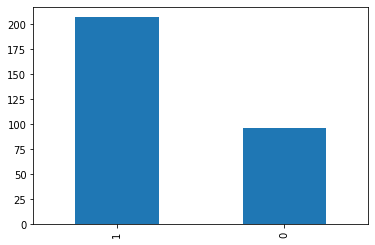

In [10]:
df.sex.value_counts().plot(kind="bar");

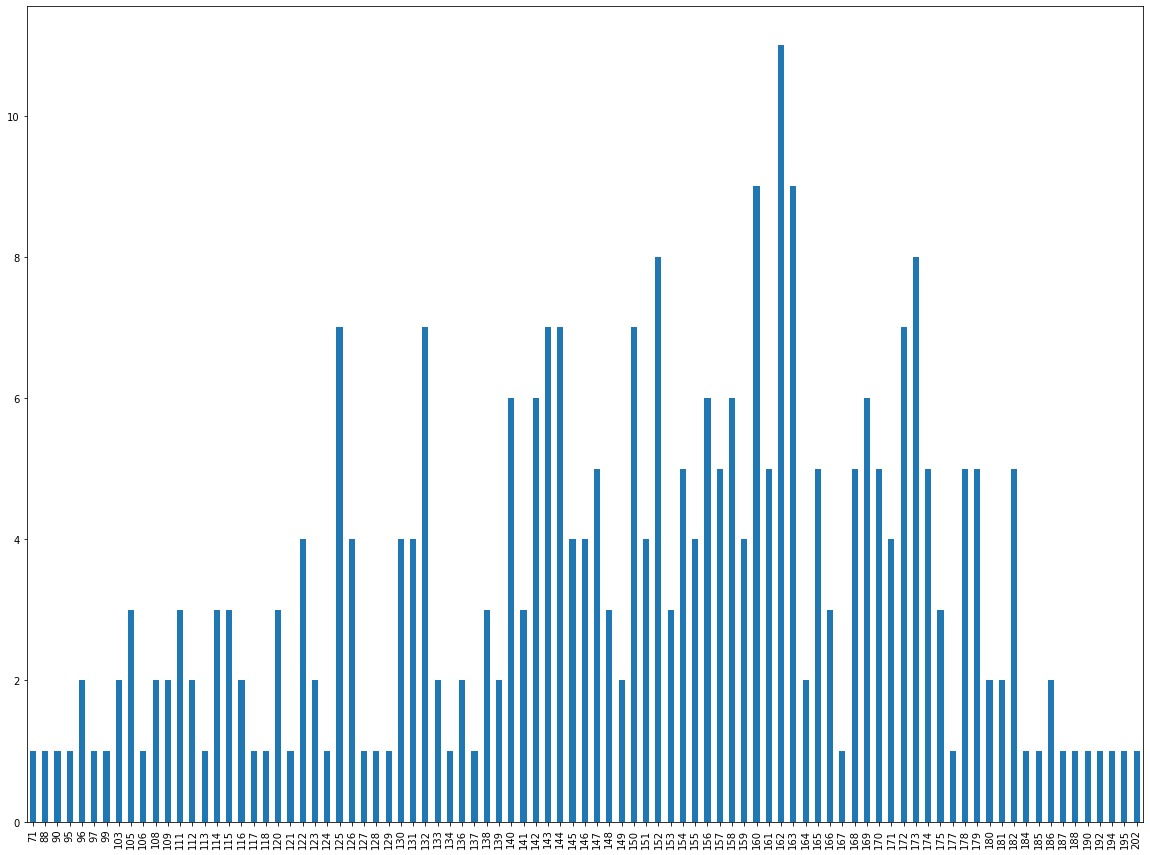

In [11]:
df.thalachh.value_counts().sort_index().plot(kind="bar", figsize=(20,15));

In [12]:
x= df.thalachh
y= df.age
plt.setstyle="whitegrid"

Text(0, 0.5, 'Age')

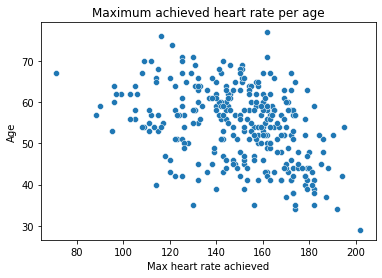

In [13]:
sns.scatterplot(x,y);
plt.title('Maximum achieved heart rate per age')
plt.xlabel('Max heart rate achieved')
plt.ylabel('Age')

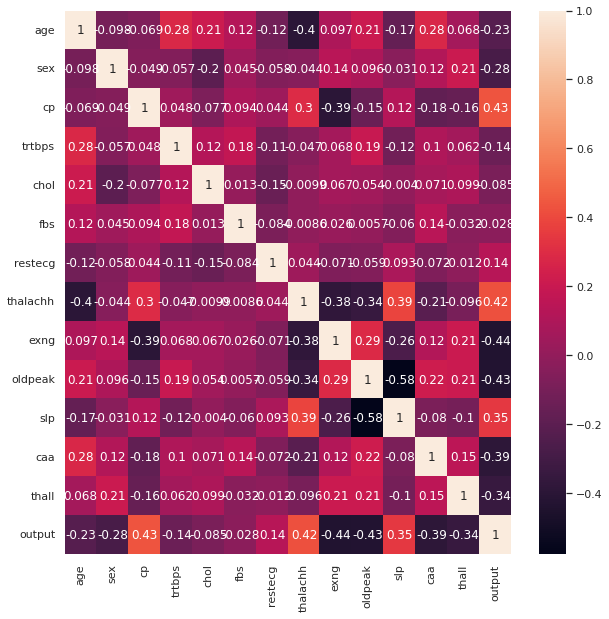

In [14]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df.corr(),annot=True);

Text(0, 0.5, 'Cholestoral in mg/dl')

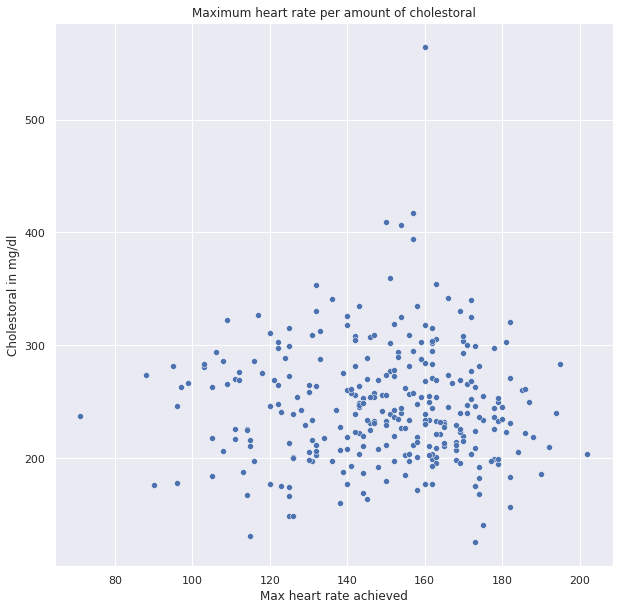

In [15]:
sns.scatterplot(x=df["thalachh"],y=df["chol"]);
plt.title('Maximum heart rate per amount of cholestoral')
plt.xlabel('Max heart rate achieved')
plt.ylabel('Cholestoral in mg/dl')

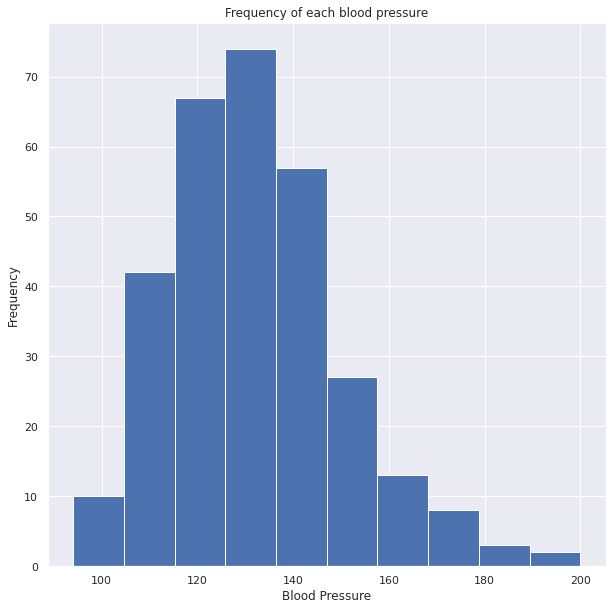

In [16]:
plt.title('Frequency of each blood pressure')
df.trtbps.plot(kind='hist')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency');

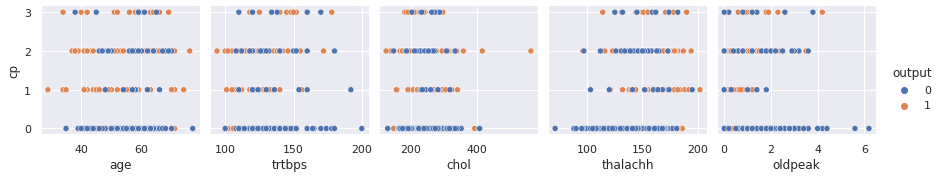

In [17]:
x_vars = ['age','trtbps', 'chol', 'thalachh', 'oldpeak']
y_vars = ['cp']

sns.pairplot(data = df, x_vars = x_vars, y_vars = y_vars, hue='output')

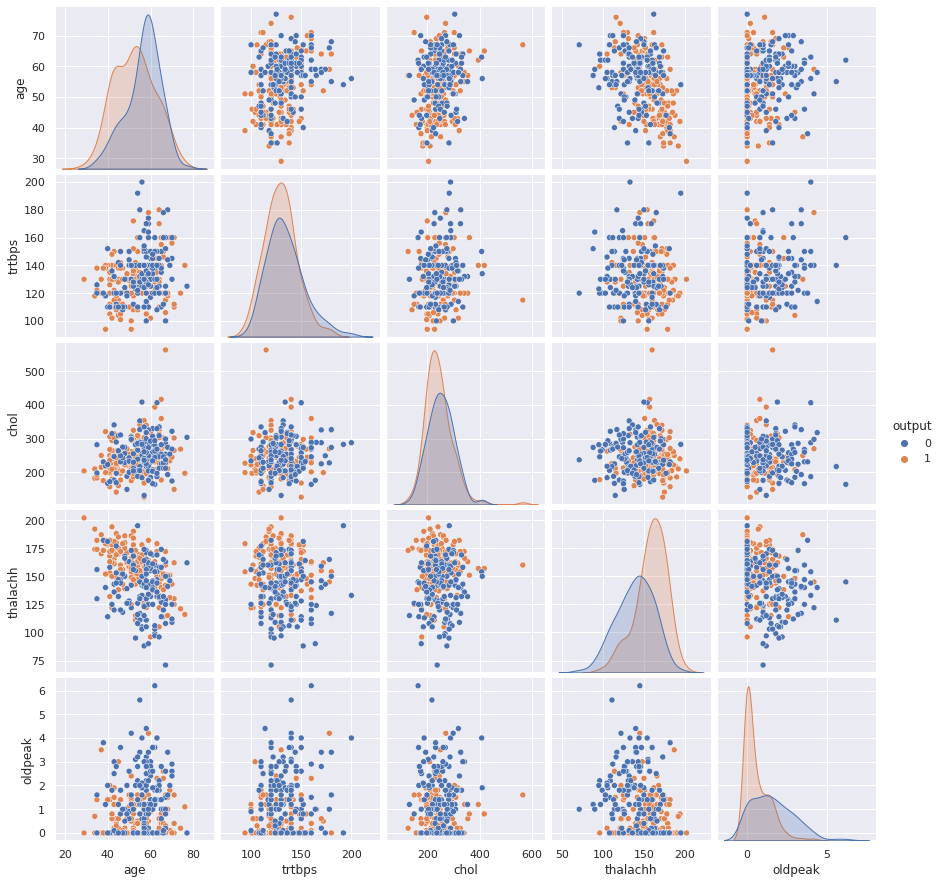

In [18]:
x_vars = ['age','trtbps', 'chol', 'thalachh', 'oldpeak']
y_vars = ['age','trtbps', 'chol', 'thalachh', 'oldpeak']

sns.pairplot(data = df, x_vars = x_vars, y_vars = y_vars, hue='output')

### Data modeling
###### Creating models to make predictions or classify the data.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [20]:
#Defining x and y
x = df.iloc[:, :-1].values
y =  df.iloc[:, -1].values #???
x,y

(array([[63.,  1.,  3., ...,  0.,  0.,  1.],
        [37.,  1.,  2., ...,  0.,  0.,  2.],
        [41.,  0.,  1., ...,  2.,  0.,  2.],
        ...,
        [68.,  1.,  0., ...,  1.,  2.,  3.],
        [57.,  1.,  0., ...,  1.,  1.,  3.],
        [57.,  0.,  1., ...,  1.,  1.,  2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
mb=MultinomialNB()

In [23]:
tahmin1=mb.fit(x_train,y_train).predict(x_test)

In [24]:
accuracy_score(tahmin1,y_test)

0.8524590163934426

In [25]:
lr=LogisticRegression()

In [26]:
tahmin2=lr.fit(x_train,y_train).predict(x_test)

In [27]:
accuracy_score(tahmin2,y_test)

0.8852459016393442

In [28]:
dt=DecisionTreeClassifier()

In [29]:
tahmin3=dt.fit(x_train,y_train).predict(x_test)

In [30]:
accuracy_score(tahmin3,y_test)

0.819672131147541

In [31]:
rf=RandomForestClassifier()

In [32]:
tahmin4=rf.fit(x_train,y_train).predict(x_test)

In [33]:
tahmin4

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [34]:
accuracy_score(tahmin4,y_test)

0.8360655737704918

In [35]:
if (tahmin4[2]==0):
  print("No risk for heart attack")
else:
  print("Patient may be exposed heart attack")

Patient may be exposed heart attack


In [36]:
#Saving this trained model
import pickle

In [37]:
filename = 'trained_model.sav'
pickle.dump(rf,open(filename,'wb')) #binary format (wb)

In [38]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [39]:
input_data = (18,1 ,0 ,130,131,0,1,115,1,1.2,1,1,3)


#changing the input data to numpy array
np_input_data = np.asarray(input_data)

# reshape the array as we are predicting for one instance
reshaped_input_data= np_input_data.reshape(1,-1)

prediction = loaded_model.predict(reshaped_input_data)
print("Our prediction: ",prediction)

if (tahmin4[0]==0):
  print("No risk for heart attack")
else:
  print("Patient may be exposed heart attack")

Our prediction:  [0]
No risk for heart attack
